# Matplotlib绘图
matplotlib是python的一个绘图库.使用它可以很方便的绘制出版质量级别的图形.

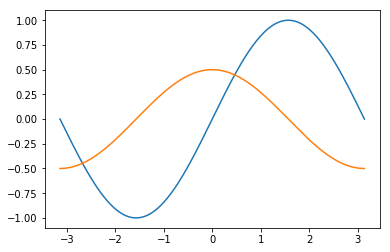

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp

# [-π,π] 拆1000个点
x = np.linspace(-np.pi, np.pi, 1000)
sin_x = np.sin(x)
# 绘制余弦曲线 y=1/2 * cos(x)
cos_x = np.cos(x) / 2
# 绘图
mp.plot(x, sin_x)
mp.plot(x, cos_x)

mp.show()

## 常用的plot属性


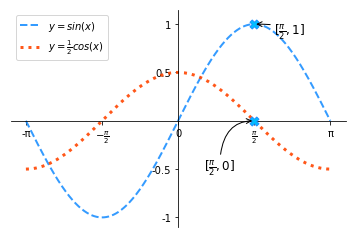

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp

# [-π,π] 拆1000个点
x = np.linspace(-np.pi, np.pi, 1000)
#print(x)
sin_x = np.sin(x)
# 绘制余弦曲线 y=1/2 * cos(x)
cos_x = np.cos(x) / 2
# 绘图
mp.plot(x, sin_x, linestyle='--', linewidth=2, 
		color='dodgerblue', alpha=0.9,
		label=r'$y=sin(x)$')
mp.plot(x, cos_x, linestyle=':', linewidth=3,
	    color='orangered', alpha=0.9,
	    label=r'$y=\frac{1}{2}cos(x)$')
# 修改可视范围
# mp.xlim(0, np.pi)
# mp.ylim(0, 1)

# 修改坐标刻度
x_val_list=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_text_list=['-π', r'$-\frac{\pi}{2}$', '0', 
			 r'$\frac{π}{2}$', 'π']
mp.xticks(x_val_list, x_text_list)
mp.yticks([-1, -0.5, 0.5, 1], 
	      ['-1', '-0.5', '0.5', '1'])

# 设置坐标轴
ax = mp.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))

# 绘制两个特殊点
mp.scatter([np.pi/2, np.pi/2], [0, 1], 
	marker='X', s=80, edgecolor='dodgerblue',
	facecolor='deepskyblue', zorder=3)

# 为点添加备注
ap = dict(arrowstyle='->', 
		  connectionstyle='angle3')
mp.annotate(r'$[\frac{\pi}{2}, 1]$', 
	xycoords='data', xy=(np.pi/2, 1), 
	textcoords='offset points', xytext=(20,-10),
	fontsize=12, arrowprops=ap)

mp.annotate(r'$[\frac{\pi}{2}, 0]$', 
	xycoords='data', xy=(np.pi/2, 0), 
	textcoords='offset points', xytext=(-50,-50),
	fontsize=12, arrowprops=ap)


# 显示图例
mp.legend(loc='best')
mp.show()

## 高级窗口


### 简单布局


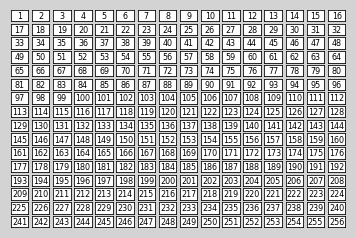

In [9]:
%matplotlib inline
import matplotlib.pyplot as mp

mp.figure('Subplot A', facecolor='lightgray')

for i in range(256):
	mp.subplot(16,16,i+1)
	mp.xticks([])
	mp.yticks([])
	mp.text(0.5, 0.5, i+1, ha='center', 
		    va='center', size=8, alpha=1)
	#mp.tight_layout()
mp.show()

### 栅格化布局

import matplotlib.gridspec as mg<br>
mp.figure(...)<br>
#构建3*3的网格布局结构<br>
gs = mg.GridSpec(3, 3)<br>
#绘制图的位置<br>
mp.subplot(gs[0, :2])<br>
mp.show()<br>

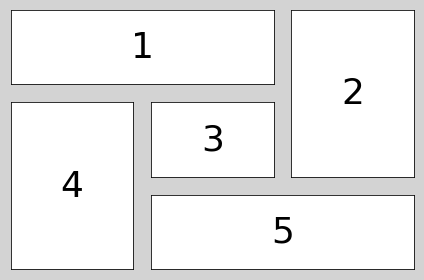

In [6]:
%matplotlib inline
import matplotlib.pyplot as mp

import matplotlib.gridspec as mg

mp.figure('Grid Layout', facecolor='lightgray')
gs = mg.GridSpec(3, 3)

mp.subplot(gs[0, :2])
mp.text(0.5, 0.5, '1', ha='center',
	    va='center', size=36)
mp.xticks([])
mp.yticks([])

mp.subplot(gs[:2, 2])
mp.text(0.5, 0.5, '2', ha='center',
	    va='center', size=36)
mp.xticks([])
mp.yticks([])

mp.subplot(gs[1, 1])
mp.text(0.5, 0.5, '3', ha='center',
	    va='center', size=36)
mp.xticks([])
mp.yticks([])

mp.subplot(gs[1:, 0])
mp.text(0.5, 0.5, '4', ha='center',
	    va='center', size=36)
mp.xticks([])
mp.yticks([])

mp.subplot(gs[2, 1:])
mp.text(0.5, 0.5, '5', ha='center',
	    va='center', size=36)
mp.xticks([])
mp.yticks([])
mp.tight_layout()
mp.show()

### 自由布局

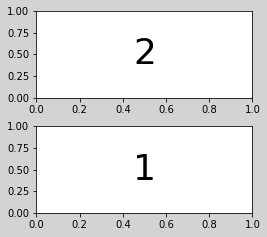

In [9]:
%matplotlib inline 
import matplotlib.pyplot as mp

mp.figure('Flow Layout', facecolor='lightgray')
# 0.1, 0.1: 子图左下角定点坐标
# 0.5: 子图的宽度   0.3:子图的高度
mp.axes([0.1, 0.1, 0.5, 0.3])
mp.text(0.5, 0.5, '1', ha='center',
        va='center', size=36)

mp.axes([0.1, 0.5, 0.5, 0.3])
mp.text(0.5, 0.5, '2', ha='center',
        va='center', size=36)
mp.show()

## 刻度绘制

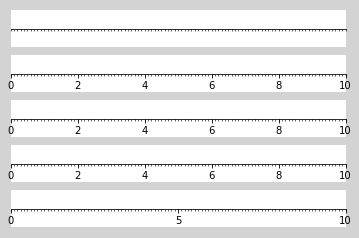

In [10]:
import matplotlib.pyplot as mp

locators = ['mp.NullLocator()', 
			'mp.MultipleLocator(2)', 
			'mp.MaxNLocator(nbins=6)',
			'mp.AutoLocator()',
			'mp.FixedLocator(locs=[0, 5, 10])']

mp.figure('Locator', facecolor='lightgray')

for i, locator in enumerate(locators):
	mp.subplot(len(locators), 1, i+1)
    # 获取当前坐标轴
	ax = mp.gca()
	ax.spines['left'].set_color('none')
	ax.spines['top'].set_color('none')
	ax.spines['right'].set_color('none')
	mp.ylim(-1, 1)
	mp.xlim(0, 10)
	mp.yticks([])
	ax.spines['bottom'].set_position(('data', 0))
	# 设置水平轴的刻度定位器
	ax.xaxis.set_major_locator(eval(locator))
    # 设置x轴的次刻度定位器
	l2 = mp.MultipleLocator(0.1)
	ax.xaxis.set_minor_locator(l2)


mp.show()

## 刻度网格线


In [ ]:
ax = mp.gca()
ax.grid(
	which='', # 'major'|'minor'|'both'
    axis='',  # 'x'|'y'|'both'
    linewidth=1,
    linestyle=':',
    color='',
    alpha=0.5
)

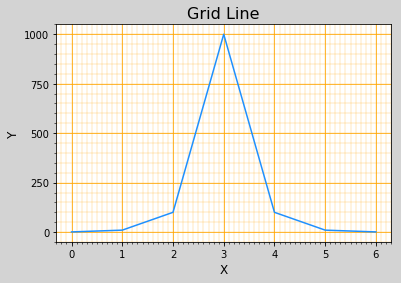

In [11]:
import matplotlib.pyplot as mp

mp.figure('Grid Line', facecolor='lightgray')
mp.title('Grid Line', fontsize=16)
mp.xlabel('X', fontsize=12)
mp.ylabel('Y', fontsize=12)
mp.tick_params(labelsize=10)
# 绘制刻度网格线
ax = mp.gca()
ax.xaxis.set_major_locator(mp.MultipleLocator())
ax.xaxis.set_minor_locator(
		mp.MultipleLocator(0.1))
ax.yaxis.set_major_locator(
		mp.MultipleLocator(250))
ax.yaxis.set_minor_locator(
		mp.MultipleLocator(50))
ax.grid(which='major', axis='both', 
	    linewidth=0.75, linestyle='-', 
	    color='orange')
ax.grid(which='minor', axis='both', 
	    linewidth=0.25, linestyle='-', 
	    color='orange')

y = [1, 10, 100, 1000, 100, 10, 1]
mp.plot(y, color='dodgerblue')
mp.show()

## 对数坐标
**y轴将会以指数方式递增. 基于半对数坐标系表示上述曲线可以更好的观察底部数据细节.**

In [ ]:
# plot改为semilogy, 坐标系将会改为半对数坐标系
mp.semilogy()

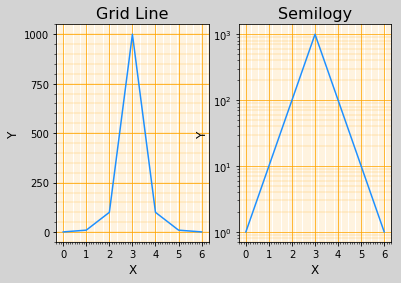

In [12]:
import matplotlib.pyplot as mp

mp.figure('Grid Line', facecolor='lightgray')
mp.subplot(1, 2, 1)
mp.title('Grid Line', fontsize=16)
mp.xlabel('X', fontsize=12)
mp.ylabel('Y', fontsize=12)
mp.tick_params(labelsize=10)
# 绘制刻度网格线
ax = mp.gca()
ax.xaxis.set_major_locator(mp.MultipleLocator())
ax.xaxis.set_minor_locator(
		mp.MultipleLocator(0.1))
ax.yaxis.set_major_locator(
		mp.MultipleLocator(250))
ax.yaxis.set_minor_locator(
		mp.MultipleLocator(50))
ax.grid(which='major', axis='both', 
	    linewidth=0.75, linestyle='-', 
	    color='orange')
ax.grid(which='minor', axis='both', 
	    linewidth=0.25, linestyle='-', 
	    color='orange')
y = [1, 10, 100, 1000, 100, 10, 1]
mp.plot(y, color='dodgerblue')


mp.subplot(1, 2, 2)
mp.title('Semilogy', fontsize=16)
mp.xlabel('X', fontsize=12)
mp.ylabel('Y', fontsize=12)
mp.tick_params(labelsize=10)
# 绘制刻度网格线
ax = mp.gca()
ax.xaxis.set_major_locator(mp.MultipleLocator())
ax.xaxis.set_minor_locator(
		mp.MultipleLocator(0.1))
ax.yaxis.set_major_locator(
		mp.MultipleLocator(250))
ax.yaxis.set_minor_locator(
		mp.MultipleLocator(50))
ax.grid(which='major', axis='both', 
	    linewidth=0.75, linestyle='-', 
	    color='orange')
ax.grid(which='minor', axis='both', 
	    linewidth=0.25, linestyle='-', 
	    color='orange')
y = [1, 10, 100, 1000, 100, 10, 1]
mp.semilogy(y, color='dodgerblue')

mp.show()

## 散点图

In [15]:
mp.scatter(
	xarray, yarray,  # 给出点的坐标
    marker='',		 # 点型
    s = 60,			 # 点的大小
    edgecolor='',	 # 边缘色
    facecolor='',	 # 填充色
    zorder=3,		 # 绘制图层编号 
    c=d,			 # 设置过渡性颜色
    cmap='jet'		 # 颜色映射
)

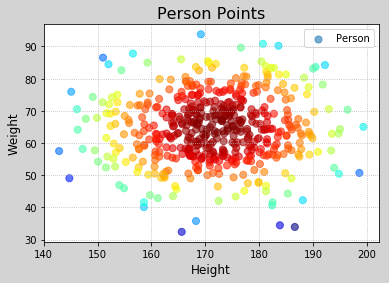

In [13]:
import numpy as np
import matplotlib.pyplot as mp

n = 500
# 随机生成500个样本身高
x = np.random.normal(172, 10, n)
# 随机生成500个样本体重
y = np.random.normal(65, 10, n)

mp.figure('Persons', facecolor='lightgray')
mp.title('Person Points', fontsize=16)
mp.xlabel('Height', fontsize=12)
mp.ylabel('Weight', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

d = (x-172)**2 + (y-65)**2
mp.scatter(x, y, c=d, cmap='jet_r',
	alpha=0.6, label='Person', s=50)
mp.legend()
mp.show()

# 各种图表类型

## 绘制填充
```python
mp.fill_between(
	x, #第一个参数表示覆盖的区域，我直接复制为x，表示整个x都覆盖
    sinx,#表示覆盖的下限
    cosx, #表示覆盖的上限
    sinx < cosx,#覆盖区域
    color='',#覆盖区域的颜色
    alpha=0.6#覆盖区域的透明度[0,1],其值越大，表示越不透明
)

```

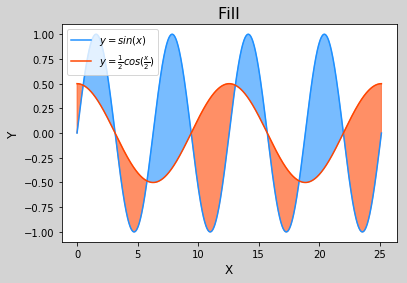

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp

# 生成数据
n = 1000
x = np.linspace(0, 8 * np.pi, n)
sinx = np.sin(x)
cosx = np.cos(x / 2) / 2

mp.figure('Fill', facecolor='lightgray')
mp.title('Fill', fontsize=16)
mp.xlabel('X', fontsize=12)
mp.ylabel('Y', fontsize=12)
mp.tick_params(labelsize=10)
mp.plot(x, sinx, color='dodgerblue',
        label=r'$y=sin(x)$')
mp.plot(x, cosx, color='orangered',
        label=r'$y=\frac{1}{2}cos(\frac{x}{2})$')
# 设置填充
mp.fill_between(x, sinx, cosx, sinx > cosx,
                color='dodgerblue', alpha=0.6)
mp.fill_between(x, sinx, cosx, sinx < cosx,
                color='orangered', alpha=0.6)

mp.legend()
mp.show()

## 条形图柱状图
```python
mp.figure()
mp.bar(
	x,	# 水平坐标数组
    y,  # 每个柱子的高度数组
    width,	# 柱子的宽度
    color='',
    label=''
)

```

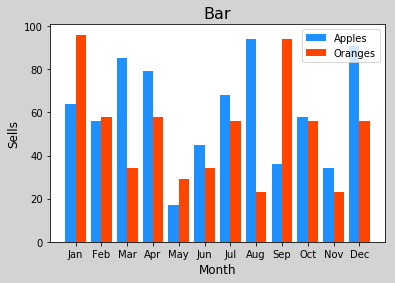

In [3]:
import numpy as np
import matplotlib.pyplot as mp

# 生成数据
apples = np.array([64, 56, 85, 79, 17, 45, 68, 94, 36, 58, 34, 91])
oranges = np.array([96, 58, 34, 58, 29, 34, 56, 23, 94, 56, 23, 56])

# 绘制图像
mp.figure('Bar', facecolor='lightgray')
mp.title('Bar', fontsize=16)
mp.xlabel('Month', fontsize=12)
mp.ylabel('Sells', fontsize=12)
mp.tick_params(labelsize=10)
x = np.arange(apples.size)
mp.bar(x - 0.2, apples, 0.4, color='dodgerblue',
       label='Apples', align='center')
mp.bar(x + 0.2, oranges, 0.4, color='orangered',
       label='Oranges')
mp.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
mp.legend()
mp.show()

## 饼状图
```python
mp.pie(
	values, 	# 一组数据列表
    spaces, 	# 扇形之间的间距列表
    labels,		# 标签列表
    colors,		# 扇形的颜色列表
    '%.2f%%',	# 百分比的格式
    shadow=True,# 添加阴影
    starangle=90# 起始角度
)

```

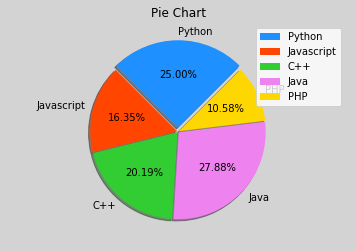

In [4]:
import numpy as np
import matplotlib.pyplot as mp

mp.figure('Pie Chart', facecolor='lightgray')
mp.title('Pie Chart', fontsize=12)
# 整理数据
values = [26, 17, 21, 29, 11]
spaces = [0.05, 0.01, 0.01, 0.01, 0.01]
labels = ['Python', 'Javascript', 'C++',
          'Java', 'PHP']
colors = ['dodgerblue', 'orangered',
          'limegreen', 'violet', 'gold']

# 绘制图形
mp.axis('equal')  # 设置等轴比例
mp.pie(values, spaces, labels, colors,
       '%.2f%%', shadow=True, startangle=45)
mp.legend()
mp.show()

## 等高线
```python
cntr=mp.contour(
	x,   # 网格点坐标矩阵的x坐标数组
    y,	 # 网格点坐标矩阵的y坐标数组
    z,   # 网格点坐标矩阵中每个坐标的高度数组
    8,   # 把整体高度分8份
    colors='black',
    linewidths=0.5   
)
# 为等高线添加高度值标签文本
mp.clabel(cntr, inline_spacing=1, fmt='%.1f',fontsize=10)
# 为等高线图绘制填充色
mp.contourf(x, y, z, 8, cmap='jet')

```

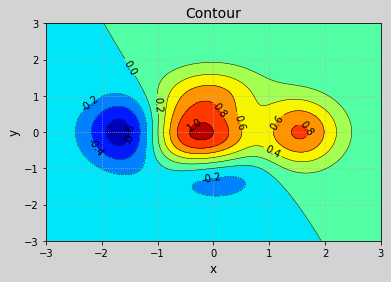

In [5]:
import numpy as np
import matplotlib.pyplot as mp

# 整理数据
n = 1000
# x与y：从-3~3拆1000个点
x, y = np.meshgrid(np.linspace(-3, 3, n),
                   np.linspace(-3, 3, n))
# 通过一个数学公式计算每个网格点的高度
z = (1 - x / 2 + x**5 + y**3) * \
    np.exp(-x**2 - y**2)

# 绘制图形
mp.figure('Contour', facecolor='lightgray')
mp.title('Contour', fontsize=14)
mp.xlabel('x', fontsize=12)
mp.ylabel('y', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
# 绘制等高线图
cntr = mp.contour(x, y, z, 8, colors='black',
                  linewidths=0.5)
# 为等高线添加高度值标签文本
mp.clabel(cntr, inline_spacing=1, fmt='%.1f',
          fontsize=10)
# 为等高线图绘制填充色
mp.contourf(x, y, z, 8, cmap='jet')

mp.show()

## 热成像
```python
# 把z矩阵以图像的形式显示出来
# z中每个位置都有相应的数值，根据数值大小，从
# cmap映射中选取当前位置的颜色从而绘制整个图像
mp.imshow(z, cmap='jet')
mp.colorbar()
```

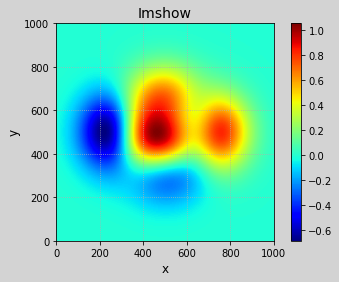

In [6]:
import numpy as np
import matplotlib.pyplot as mp

# 整理数据
n = 1000
# x与y：从-3~3拆1000个点
x, y = np.meshgrid(np.linspace(-3, 3, n),
                   np.linspace(-3, 3, n))
# 通过一个数学公式计算每个网格点的高度
z = (1 - x / 2 + x**5 + y**3) * \
    np.exp(-x**2 - y**2)

# 绘制图形
mp.figure('Imshow', facecolor='lightgray')
mp.title('Imshow', fontsize=14)
mp.xlabel('x', fontsize=12)
mp.ylabel('y', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.imshow(z, cmap='jet', origin='lower')
mp.colorbar()
mp.show()

## 3D图像的绘制
```python
from mpl_toolkits.mplot3d import axes3d
ax3d = mp.gca(projection='3d')
# 调用ax3d的方法绘制3D图形

```
```python
ax3d.scatter(
	x, y, z, 
    s=60,
    marker='',
    edgecolor='',
    facecolor='',
    c=d,
    cmap=''
)

```

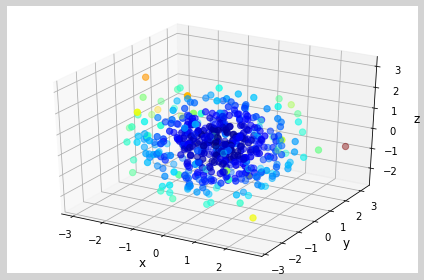

In [7]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d

# 准备数据
n = 500
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
z = np.random.normal(0, 1, n)

# 绘制图像
mp.figure('3D Points', facecolor='lightgray')
ax3d = mp.gca(projection='3d')
ax3d.set_xlabel('x', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)
mp.tick_params(labelsize=10)
d = x**2 + y**2 + z**2
ax3d.scatter(x, y, z, c=d, cmap='jet', s=40,
             label='Points')
mp.tight_layout()
mp.show()


## 3D线框图
```python
ax3d.plot_wireframe(
    x, y, 			# x、y网格点坐标矩阵
    z,				# 每个坐标的z的值
	rstride=30,		# 行跨距
	cstride=30,		# 列跨距
	linewidth=1,
    color=''
)
```

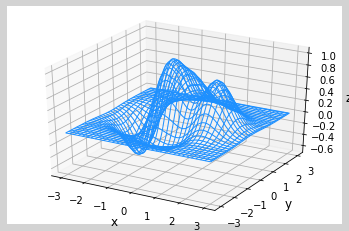

In [8]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
# 整理数据
n = 1000
# x与y：从-3~3拆1000个点
x, y = np.meshgrid(np.linspace(-3, 3, n),
                   np.linspace(-3, 3, n))
# 通过一个数学公式计算每个网格点的高度
z = (1 - x / 2 + x**5 + y**3) * \
    np.exp(-x**2 - y**2)

# 绘制图形
mp.figure('Wire Frame', facecolor='lightgray')
ax3d = mp.gca(projection='3d')
ax3d.set_xlabel('x', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)
ax3d.plot_wireframe(
    x, y, z, rstride=30, cstride=30,
    linewidth=1, color='dodgerblue')
mp.show()

## 3D曲面图
```python

ax3d.plot_surface(
    x, y, 			ax3d. # x、y网格点坐标矩阵
    z,				# 每个坐标的z的值
	rstride=30,		# 行跨距
	cstride=30,		# 列跨距
    cmap='jet'
)

```

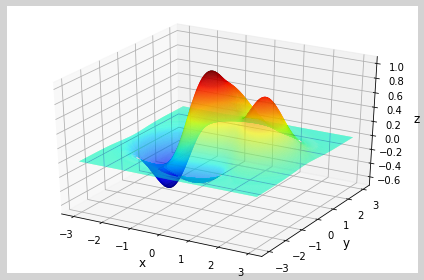

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
# 整理数据
n = 1000
# x与y：从-3~3拆1000个点
x, y = np.meshgrid(np.linspace(-3, 3, n),
                   np.linspace(-3, 3, n))
# 通过一个数学公式计算每个网格点的高度
z = (1 - x / 2 + x**5 + y**3) * \
    np.exp(-x**2 - y**2)

# 绘制图形
mp.figure('3D Surface', facecolor='lightgray')
ax3d = mp.gca(projection='3d')
ax3d.set_xlabel('x', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)
ax3d.plot_surface(
    x, y, z, rstride=1, cstride=1, cmap='jet')
mp.tight_layout()
mp.show()

## 极坐标系
```python
#若希望坐标系变为极坐标系，只需要设置：
mp.gca(projection='polar')

```

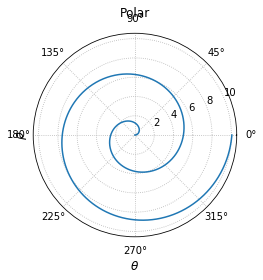

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp

mp.figure('Polar')
mp.gca(projection='polar')
mp.title('Polar')
mp.xlabel(r'$\theta$', fontsize=12)
mp.ylabel(r'$\rho$', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
# 绘制曲线
t = np.linspace(0, 4 * np.pi, 1000)
r = 0.8 * t
mp.plot(t, r)
mp.tight_layout()
mp.show()

## 简单动画
```python
import matplotlib.animation as ma
# 定义更新界面的逻辑
def update(number):
    pass

# 针对当前窗口，每10毫秒执行一次update函数
ma.FuncAnimation(
    mp.gcf(), update, interval=10)

```

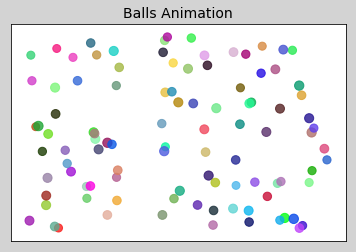

In [4]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
"""
demo 动画小球
"""
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as ma

# 整理数据
n = 100
balls = np.zeros(100, dtype=[
    ('position', float, 2),
    ('size', float, 1),
    ('growth', float, 1),
    ('color', float, 3)])

balls['position'] = np.random.uniform(0, 1, (n, 2))
balls['size'] = np.random.uniform(50, 70, n)
balls['growth'] = np.random.uniform(10, 20, n)
balls['color'] = np.random.uniform(0, 1, (n, 3))

# 绘制图像
mp.figure('Balls Animation', facecolor='lightgray')
mp.title('Balls Animation', fontsize=14)
mp.xticks([])
mp.yticks([])
sc = mp.scatter(balls['position'][:, 0],
                balls['position'][:, 1],
                s=balls['size'],
                color=balls['color'],
                alpha=0.8)


def update(number):
    balls['size'] += balls['growth']
    boom_i = number % 100
    balls[boom_i]['size'] = np.random.uniform(50, 70, 1)
    balls[boom_i]['position'] = np.random.uniform(0, 1, (1, 2))
    # 更新每个球的大小
    sc.set_sizes(balls['size'])
    sc.set_offsets(balls['position'])

anim = ma.FuncAnimation(mp.gcf(), update, interval=30)
mp.show()

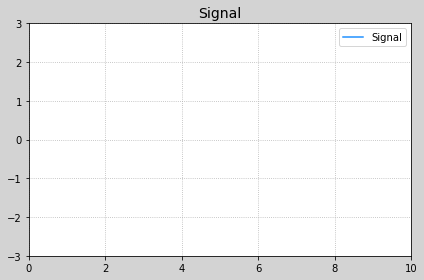

In [5]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
"""
demo  带有生成器函数的简单动画
"""
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as ma

mp.figure('Signal', facecolor='lightgray')
mp.title('Signal', fontsize=14)
mp.xlim(0, 10)
mp.ylim(-3, 3)
mp.grid(linestyle=':')
pl = mp.plot([], [], color='dodgerblue',
             label='Signal')[0]

x = 0


def update(data):
    t, v = data
    x, y = pl.get_data()
    x = np.append(x, t)  # x末尾追加t
    y = np.append(y, v)  # y末尾追加v
    pl.set_data(x, y)
    # 移动坐标轴
    if(x[-1] > 10):
        mp.xlim(x[-1] - 10, x[-1])


def generator():
    # 通过x  计算y， 作为一组新数据交给update
    global x
    y = np.sin(2 * np.pi * x) * \
        np.exp(np.sin(0.2 * np.pi * x))
    yield (x, y)
    x += 0.05

# 基于动画动态绘制图像
anim = ma.FuncAnimation(
    mp.gcf(), update, generator, interval=30)

mp.tight_layout()
mp.legend()
mp.show()


## 加载数据
```python
def func(s):
    return '2011-11-11'

a, b, c, d, e = np.loadtxt(
    '../data/a.txt', 	# 文件路径
    skiprows=1,			# 跳过头部1行
    delimiter=',', 		# 字段间的分隔符
    usecols=(1,3,4,5,6),# 读取哪些列
    unpack=True,		# 是否解包二维数组
    dtype='M8[D],f8,f8,f8,f8',
    converters={1:func}
)

```

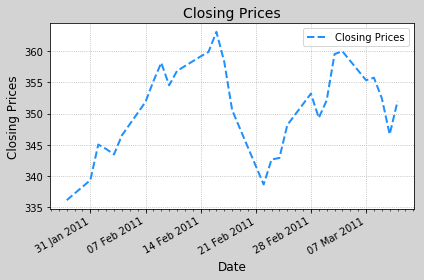

In [6]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
"""
demo13_K.py  读取数据
"""
import numpy as np
import matplotlib.pyplot as mp
import datetime as dt
import matplotlib.dates as md


def dmy2ymd(s):
    dmy = str(s, encoding='utf-8')
    time = dt.datetime.strptime(dmy, '%d-%m-%Y')
    ymd = time.date().strftime('%Y-%m-%d')
    return ymd

# 读取文件数据
dates, opening_prices, highest_prices,\
    lowest_prices, closing_prices = np.loadtxt(
        'da_data/aapl.csv', unpack=True,
        delimiter=',', usecols=(1, 3, 4, 5, 6),
        dtype='M8[D], f8, f8, f8, f8',
        converters={1: dmy2ymd})

# 绘制收盘价的折线图
mp.figure('Closing Prices', facecolor='lightgray')
mp.title('Closing Prices', fontsize=14)
mp.xlabel('Date', fontsize=12)
mp.ylabel('Closing Prices', fontsize=12)
mp.grid(linestyle=':')
mp.tick_params(labelsize=10)
# 设置刻度定位器
ax = mp.gca()
# 主刻度定位器为WeekdayLocator，每周一为主刻度
ax.xaxis.set_major_locator(
    md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(
    md.DateFormatter('%d %b %Y'))
# 设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(md.DayLocator())

# 把dates转换为matplotlib识别的datetime类型
dates = dates.astype(md.datetime.datetime)
mp.plot(dates, closing_prices, c='dodgerblue',
        linewidth=2, linestyle='--',
        label='Closing Prices')
mp.legend()
mp.gcf().autofmt_xdate()
mp.tight_layout()
mp.show()


## 总结
1. mp.plot(x,y,linestyle='--',linewidth=3,color='red',alpha=0.3)
   * x:水平数据
   * y:垂直数据
   * linestyle：线条的类型（':','-','--'）
   * linewidth:线条粗细（数字）
   * color：颜色
   * alpha：透明度（小数）
2. mp的方法
   * 绘制水平线/垂直线
       * 绘制垂直线
       * mp.vlines(val, ymin, ymax)
       * 绘制水平线
       * mp.hlines(val, xmin, xmax)
   * 绘制坐标轴范围
       * 设置x轴的可视范围   [x_min, x_max]
           * mp.xlim(x_min, x_max)
       * 设置y轴的可视范围   [y_min, y_max]
           * mp.ylim(y_min, y_max)
   * 设置坐标刻度
       * 设置x轴的坐标刻度
           * x_val_list:  x轴刻度值序列
           * x_text_list: x轴刻度值的文本序列(可选)
           * mp.xticks(x_val_list, x_text_list)
       * 设置y轴的坐标刻度
           * y_val_list:  y轴刻度值序列
           * y_text_list: y轴刻度值的文本序列(可选)
           * mp.yticks(y_val_list, y_text_list)
   * 设置坐标轴
       * 获取当前坐标轴
           * ax = mp.gca()
           * axis = ax.spines['left']
           * axis = ax.spines['right']
           * axis = ax.spines['top']
           * axis = ax.spines['bottom']
       * 修改坐标轴的颜色
           * axis.set_color('red')
       * 移动坐标轴的位置&data: 基于数据坐标系进行定位   0: 把坐标轴移动到0的位置
           * axis.set_position(('data', 0))
   * 图例
       * label: 定义当前曲线的标签名 该标签名将会在图例中显示
           * mp.plot(x, y, label='sin(x)')
       * 显示图例  loc:图例的位置  (参照legend()文档字符串)
           * mp.legend(loc='best')
   * 特殊点 
       * mp.scatter(<br>
           * xarray, yarray,  # 给出点的坐标<br>
           * marker='',		 # 点型  'D'  's'  'o' ...<br>
           * s = 60,			 # 点的大小<br>
           * edgecolor='',	 # 边缘色<br>
           * facecolor='',	 # 填充色<br>
           * zorder=3		 # 绘制图层编号 (编号越大,图层越靠上)<br>
           * )<br>
   * 添加备注
       * mp.annotate(<br>
           * r'$[x, y]$', 		# 备注的文本内容<br>
           * xycoords='data',	# 目标点的坐标系<br>
           * xy=(1, 2),			# 目标点的坐标<br>
           * #定位备注文本位置所使用的坐标系<br>
           * textcoords='offset points',<br>
           * xytext=(-10, -10),	# 备注文本的坐标<br>
           * fontsize=12,		# 字体大小<br>
           * #箭头属性字典<br>
           * arrowprops=dict(<br>
               * arrowstyle : '->',			# 箭头样式<br>
               * connectionstyle='angle3'	# 连接线的样式<br>
               *      )<br>   
           * ）<br>
   * 网格刻度线
       * ax = mp.gca()
       * ax.grid(
           * which='', # 'major'|'minor'|'both'
           * axis='',  # 'x'|'y'|'both'
           * linewidth=1,
           * linestyle=':',
           * color='',
           * alpha=0.5）
   * 对数坐标
       * mp.semilogy()
   * 散点图
       * mp.scatter(
       
	       * xarray, yarray,  # 给出点的坐标
           * marker='',		 # 点型
           * s = 60,			 # 点的大小
           * edgecolor='',	 # 边缘色
           * facecolor='',	 # 填充色
           * zorder=3,		 # 绘制图层编号 
           * c=d,			 # 设置过渡性颜色
           * cmap='jet'		 # 颜色映射
           * )
   * 设置图表的标题
       * mp.title(' ', fontsize=12)
   * 设置水平轴的标签
       * mp.xlabel('time', fontsize=12)
   * 设置垂直轴的标签
       * mp.ylabel('v', fontsize=12)
   * 设置刻度参数
       * mp.tick_params(labelsize=8)
   * 设置图表网格线
       * mp.grid(linestyle=':')
   * 紧凑布局
       * mp.tight_layout()
        
       
       
       

     